In [ ]:
print('working!!!!!')
# test
# test edie branch
# test again video
# test tutorial
# test final

# confirming we can merge

working!!!!!


# Core 1: Computing the Sum of Proper Divisors

In this question, we define the function

$$
s(n)=\sum_{\substack{d \mid n \\ 0 < d < n}} d.
$$

According to the project brief (Week 8.2 Appendix),
the sum-of-divisors function is multiplicative and can be computed
efficiently using the prime factorisation of \( n \).

We first implement a basic direct-search version, and then an improved
version using the multiplicative formula for the sum of divisors.

In [ ]:
# --- Question 1 ---

def s_basic(n):
    """Basic version: checks all numbers up to n//2."""
    divisors = []
    for i in range(1, n // 2 + 1):
        if n % i == 0:
            divisors.append(i)
    return sum(divisors)


def smallest_factor(n):
    """Returns the smallest prime factor of n (from lecture 8.2 functions)."""
    i = 2
    while i * i <= n:
        if n % i == 0:
            return i
        i += 1
    return n


def decompose(n):
    """Prime factorisation of n as a dictionary {p: exponent}."""
    factors = {}
    current = n
    while current > 1:
        p = smallest_factor(current)
        factors[p] = factors.get(p, 0) + 1
        current //= p
    return factors


def s(n):
    """Efficient version using the multiplicative property."""
    if n <= 1:
        return 0

    pf = decompose(n)
    result = 1

    for p, exp in pf.items():
        # geometric series (p^(exp+1)-1)/(p-1)
        result *= (p**(exp + 1) - 1) // (p - 1)

    return result - n  # remove n itself


# Quick test
print("s_basic(102) =", s_basic(102))
print("fast s(102)   =", s(102))

s_basic(102) = 114
fast s(102)   = 114


# Core 2: Generating the Aliquot Sequence

For a given starting value \( n \), the aliquot sequence is defined as

$$
A_n = \{ n,\ s(n),\ s^{2}(n),\ s^{3}(n), \ldots \}.
$$

In practice, the project brief asks that:
- we compute at most \( k \) terms of the sequence, and
- we stop early if any term exceeds \( i = 10^9 \).

The sequence also terminates naturally if it reaches 0.

In [ ]:
# --- Question 2 ---

def a(n, iterations, cutoff=10**9):
    """
    Compute the aliquot sequence starting at n, up to:
      - max 'iterations' terms
      - stop early if s(n) > cutoff
      - stop if sequence reaches 0
    """
    seq = [n]

    for _ in range(iterations - 1):
        next_term = s(n)

        if next_term == 0:
            seq.append(0)
            return seq

        if next_term > cutoff:
            return seq

        seq.append(next_term)
        n = next_term

    return seq


# Example
print(a(1000, 30))

[1000, 1340, 1516, 1144, 1376, 1396, 1054, 674, 340, 416, 466, 236, 184, 176, 196, 203, 37, 1, 0]


# Core 3: Detecting Loops

We must determine whether the aliquot sequence starting at a given \( n \):

- terminates at \( 0 \),
- enters a loop,
- exceeds the cutoff \( i = 10^9 \), or
- continues without conclusion within the limit of \( k \) steps.

The project brief highlights the example \( n = 562 \), which eventually enters
the amicable loop:

$$
220 \longleftrightarrow 284.
$$

Therefore, our implementation must detect when a value repeats.

In [ ]:
# --- Question 3 ---

def detect_loop(n, iterations=30, cutoff=10**9):
    seen = [n]
    print(n)

    next_term = s(n)
    steps = 1

    while (next_term not in seen) and (steps < iterations) and (next_term <= cutoff):
        print(next_term)
        seen.append(next_term)
        n = next_term
        next_term = s(n)
        steps += 1

    if next_term in seen:
        print("The sequence now loops at:", next_term)
        ending = "loop"
    elif next_term == 0:
        print("The sequence terminates at 0.")
        ending = "zero"
    elif next_term > cutoff:
        print("Exceeded cutoff.")
        ending = "cutoff"
    else:
        print("Reached iteration limit.")
        ending = "k_limit"

    return {"type": ending, "seq": seen}


# Example: checking the known loop
detect_loop(562)

562
284
220
The sequence now loops at: 284


{'type': 'loop', 'seq': [562, 284, 220]}

# Core 4: Classifying All \( n < 20000 \)

For each integer \( 1 \le n < 20000 \), we classify the ending behaviour of its
aliquot sequence into one of the following four categories:

1. the sequence terminates at \( 0 \);
2. the sequence enters a loop;
3. the computation reaches the limit of \( k \) steps (cut\_k);
4. the computation exceeds the cutoff \( i = 10^9 \) (cut\_i).

Following the project brief, we use the parameters:

$$
k = 30, \qquad i = 10^9.
$$

We then count how many starting values fall into each of the four categories.

In [ ]:
# --- Question 4 ---

def sequence_end(n, k, cutoff):
    """Classify how the sequence starting at n ends."""
    seen = {n}

    for _ in range(k - 1):
        nxt = s(n)

        if nxt == 0:
            return "zero"
        if nxt > cutoff:
            return "cutoff"
        if nxt in seen:
            return "loop"

        seen.add(nxt)
        n = nxt

    return "k_limit"


def count_reason(M, k, cutoff):
    """Count how many n < M fall into each of the four categories."""
    zero = loop = cutoff_cnt = k_limit = 0

    for n in range(1, M):
        ending = sequence_end(n, k, cutoff)

        if ending == "zero":
            zero += 1
        elif ending == "loop":
            loop += 1
        elif ending == "cutoff":
            cutoff_cnt += 1
        else:
            k_limit += 1

    print(f"Summary for n < {M}:")
    print(" Terminates at 0      :", zero)
    print(" Enters a loop        :", loop)
    print(" Exceeds cutoff (1e9) :", cutoff_cnt)
    print(" Hits k=30 limit      :", k_limit)


# Try smaller first
count_reason(2000, 30, 10**9)

# Full requirement (slow)
# count_reason(20000, 30, 10**9)

Summary for n < 2000:
 Terminates at 0      : 1792
 Enters a loop        : 48
 Exceeds cutoff (1e9) : 17
 Hits k=30 limit      : 142


# Core 5: Effect of Parameter Choices

The results of the classification in Core 4 depend on the choices of:

$$
k,\qquad i,\qquad \text{and the maximum starting value (up to 20000)}.
$$

Increasing these parameters generally produces a more accurate classification
but also increases the runtime. The project brief suggests experimenting with
different values of \( k \) and \( i \), and ensuring that the code still runs in a
"reasonable" amount of time (around 30 seconds).

In [ ]:
# --- Question 5 ---

def experiment_parameters(M_list, k_list, i_list):
    """
    Run classification experiments for different combinations of:
      - maximum n (M)
      - iteration limit k
      - cutoff i
    """
    for M in M_list:# Loop over each value of M (the maximum n)
    print("Now testing with M =", M)
        for k in k_list:# Loop over each iteration limit
            for cutoff in i_list:# Loop over each cutoff threshold
                print(f"\n--- Testing M={M}, k={k}, cutoff={cutoff} ---")
                count_reason(M, k, cutoff)
                print()
                start_time = time.time()


# Example experiment (small values)
experiment_parameters(
    M_list=[20000], 
    k_list=[10, 20, 50, 100],
    i_list=[10**6, 10**9]
)


--- Testing M=20000, k=10, cutoff=1000000 ---
Summary for n < 20000:
 Terminates at 0      : 9609
 Enters a loop        : 339
 Exceeds cutoff (1e9) : 468
 Hits k=30 limit      : 9583

--- Testing M=20000, k=10, cutoff=1000000000 ---
Summary for n < 20000:
 Terminates at 0      : 9609
 Enters a loop        : 339
 Exceeds cutoff (1e9) : 0
 Hits k=30 limit      : 10051

--- Testing M=20000, k=20, cutoff=1000000 ---
Summary for n < 20000:
 Terminates at 0      : 13433
 Enters a loop        : 437
 Exceeds cutoff (1e9) : 2203
 Hits k=30 limit      : 3926

--- Testing M=20000, k=20, cutoff=1000000000 ---
Summary for n < 20000:
 Terminates at 0      : 13434
 Enters a loop        : 437
 Exceeds cutoff (1e9) : 173
 Hits k=30 limit      : 5955

--- Testing M=20000, k=30, cutoff=1000000 ---
Summary for n < 20000:
 Terminates at 0      : 15619
 Enters a loop        : 450
 Exceeds cutoff (1e9) : 2791
 Hits k=30 limit      : 1139

--- Testing M=20000, k=30, cutoff=1000000000 ---
Summary for n < 2000

# Extension 7: Visualising Aliquot Sequences that Enter Loops

Find a way of plotting to visualise aliquot sequences which enter loops.
Try to find an appealing way of demonstrating the different types of
behaviour sequences can have.

In [ ]:
# Fastest s(n) using divisor-sum sieve
def build_sieve(limit):
    s = [0] * (limit + 1)

    for d in range(1, limit // 2 + 1):
        for multiple in range(2*d, limit + 1, d):
            s[multiple] += d

    return s

In [ ]:
def classify_n(n, s_cache, k, cutoff):
    """
    classifies n using a dictionary cache (s_cache)
    avoids index errors
    """

    current = n
    seen = {}

    for step in range(k):

        # compute s(current) with cache
        if current not in s_cache:
            val = s(current)
            s_cache[current] = val
        else:
            val = s_cache[current]

        # 1. terminates
        if val == 0:
            return "zero"

        # 2. cutoff
        if val > cutoff:
            return "cutoff"

        # 3. loop detected
        if val in seen:
            return "loop"

        # move on
        seen[val] = step
        current = val

    # if reached here → exceeded k steps
    return "k_limit"

In [ ]:
def classify_all(M=20000, k=30, cutoff=10**9):
    result = {"zero": 0, "loop": 0, "cutoff": 0, "k_limit": 0}
    s_cache = {}   # dictionary instead of list

    for n in range(1, M):
        outcome = classify_n(n, s_cache, k, cutoff)
        result[outcome] += 1

    return result, s_cache

In [ ]:
import matplotlib.pyplot as plt

def plot_sequence_line(n, s_vals, k=30):
    seq = [n]
    current = n

    for _ in range(k-1):
        current = s_vals[current]
        seq.append(current)

        if current == 0:
            break

    plt.figure(figsize=(10,5))
    plt.plot(range(len(seq)), seq, marker='o')
    plt.title(f"Aliquot Sequence Starting at n={n}")
    plt.xlabel("k-th term")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

    return seq

In [ ]:
def plot_loop_pie(results, M):
    labels = {
        "zero": "Terminates at 0",
        "loop": "Enters Loop",
        "cutoff": ">10^9",
        "k_limit": "Reached k-limit"
    }

    values = [results[key] for key in labels]

    plt.figure(figsize=(7,7))
    plt.pie(values, labels=labels.values(),
            autopct="%1.1f%%", startangle=90)
    plt.title(f"Distribution of Outcomes for n < {M}")
    plt.show()

In [ ]:
results, s_vals = classify_all(M=20000, k=30, cutoff=10**9)

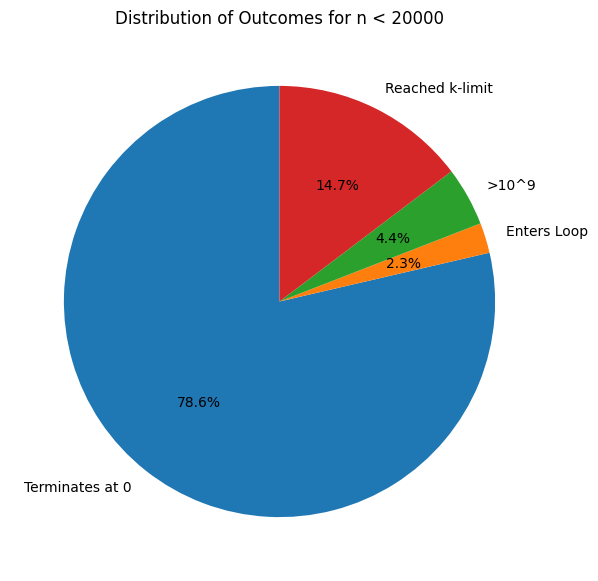

In [ ]:
plot_loop_pie(results, 20000)

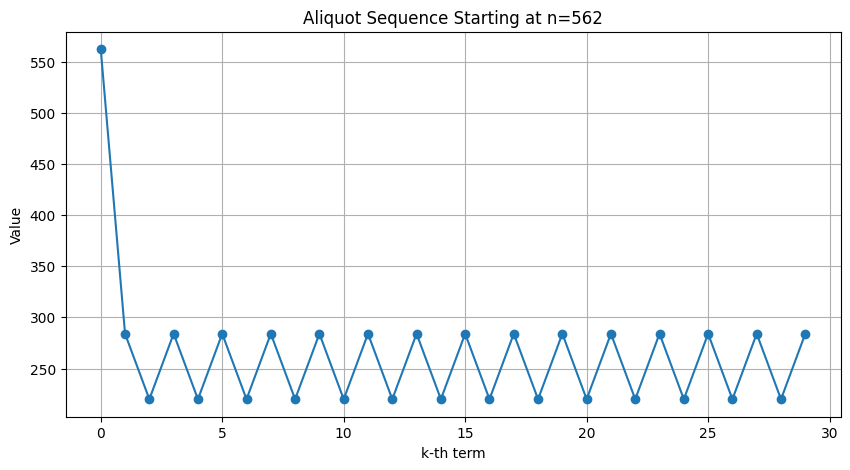

[562,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284,
 220,
 284]

In [ ]:
plot_sequence_line(562, s_vals)